In [333]:
# exercise 10_1_5
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import k_means
import pandas as pd

In [334]:
data = pd.read_csv('data.csv')
prices = data[['date','price_GER']]

In [335]:
# create a df with one column for each hour and one row for each day
prices_copy = prices.copy()
prices_copy['hour'] = prices_copy['date'].str.extract('(\d+):').astype(int)
prices_copy['day'] = prices_copy['date'].str.extract('(\d+-\d+-\d+)')
prices_tab = prices_copy.pivot(index='day',columns='hour', values='price_GER')
# drop the rows with missing values
prices_tab = prices_tab.dropna()
# Make sure that each rows has a mean of 0 and a standard deviation of 1
prices_tab = prices_tab.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
#prices_tab = prices_tab.T
#prices_tab.reset_index(drop=True, inplace=True)
#prices_tab.drop(prices_tab.columns[0], axis=1, inplace=True)
prices_df = pd.DataFrame(prices_tab, index=prices_tab.index, columns=prices_tab.columns)
prices_df

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2.835846,1.249126,0.018874,-0.488007,-0.270648,-0.717538,-1.126173,-0.936636,-0.055028,-0.176749,...,0.373604,0.370995,0.544883,1.161313,0.379690,-0.058506,-0.233262,-1.793900,-0.049811,-2.141674
2019-01-02,-1.418533,-1.713030,-1.769545,-1.690853,-1.784806,-1.331257,-0.618265,0.274526,0.528008,0.591915,...,0.565684,0.661783,0.717583,0.739998,0.862328,0.863043,0.764798,0.708760,0.696598,0.592392
2019-01-03,-1.550323,-1.308449,-1.265519,-1.436192,-1.448757,-1.235154,-0.695911,-0.517909,0.541730,0.242267,...,0.787792,1.051654,1.119714,1.239081,1.001395,1.229657,1.116573,0.419222,-0.418437,-0.810042
2019-01-04,0.154060,-0.526058,-0.533573,-0.557997,-0.546724,-0.563633,-0.060121,1.016418,1.102842,1.053994,...,0.281817,0.334422,0.503512,0.892419,0.787208,0.371998,-0.625633,-0.841692,-1.117872,-3.475738
2019-01-05,-1.067491,-1.191839,-1.261697,-1.407002,-1.663381,-1.403509,-1.315488,-0.937555,-0.387771,-0.120214,...,0.680360,0.771176,1.008694,1.029651,1.359382,1.205694,0.738343,0.678963,0.642637,0.543438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.480957,-0.685443,-0.881562,-0.877480,-0.816869,-0.878705,-0.802890,-0.410550,-0.539323,-0.558302,...,-0.665749,-0.359632,1.121872,1.410030,1.422989,1.420030,1.426255,1.418092,1.416459,1.317583
2023-12-27,-1.330084,-1.330324,-1.393328,-1.401369,-1.456932,-0.815609,-0.041798,1.354735,1.341055,1.353535,...,0.092851,0.096571,0.683411,1.291131,1.223447,0.479877,0.023487,-0.214609,-0.497828,-1.139631
2023-12-28,-1.115823,-1.191237,-1.196248,-1.256379,-1.247610,-1.176831,-0.993808,0.080780,0.483656,0.631603,...,0.397093,0.880770,1.080079,2.000707,1.770205,1.406163,0.288231,-0.181165,-0.368573,-1.048928


<Figure size 640x480 with 0 Axes>

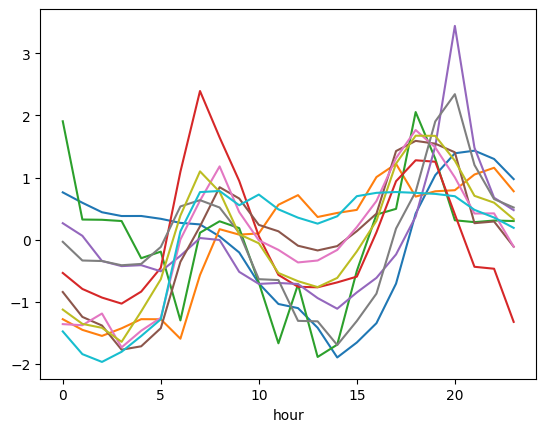

In [336]:
# plot the data for 10 random rows
plt.figure()
prices_tab.sample(10).T.plot(legend=False)
plt.show()

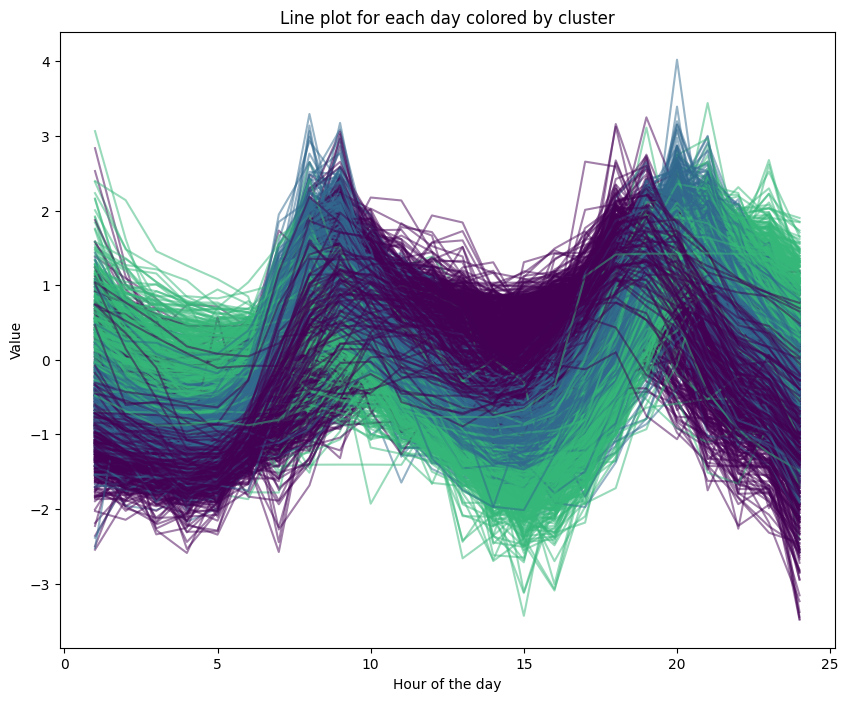

In [337]:
# Most of the explained variance is in the first and second component, so we can do a clustering only using PC1 and PC2
# Let's do a k-means clustering with a given number of cluster
from sklearn.cluster import KMeans
n_clusters=3

kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=100, max_iter=100000)
kmeans.fit(prices_df)
prices_df['cluster'] = kmeans.labels_

import matplotlib.pyplot as plt

# Assuming the columns representing hours are named as 'H1', 'H2', ..., 'H24'
hours = range(1, 25)

plt.figure(figsize=(10, 8))

# Plot a line for each day
for i in range(prices_df.shape[0]):
    plt.plot(hours, prices_df.iloc[i, :24], color=plt.cm.viridis(prices_df.iloc[i, -1]/3), alpha=0.5)

plt.xlabel('Hour of the day')
plt.ylabel('Value')
plt.title('Line plot for each day colored by cluster')
plt.show()

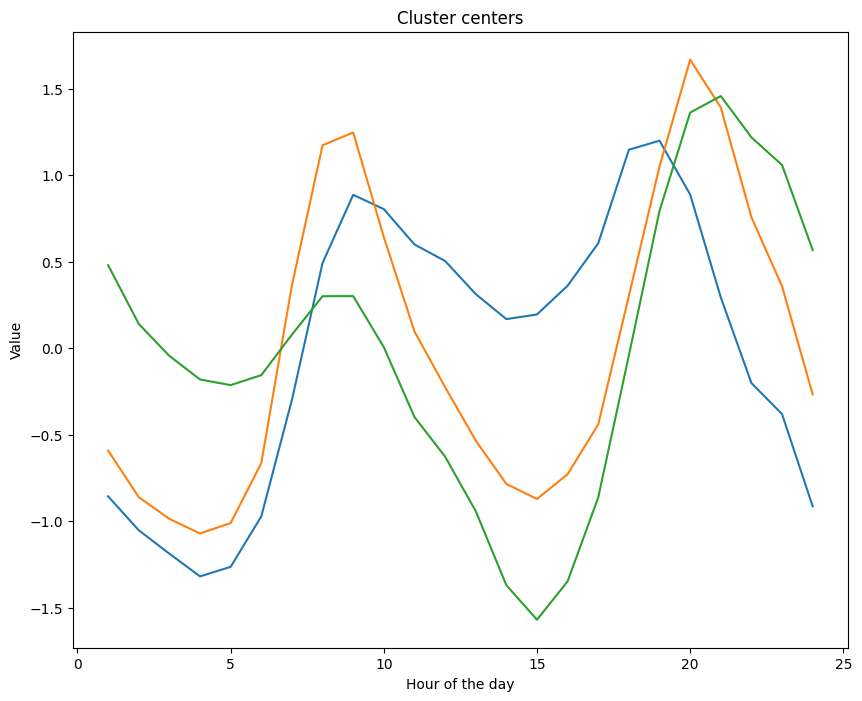

In [338]:
#plot kmeans.cluster_centers_
plt.figure(figsize=(10, 8))
plt.plot(hours, kmeans.cluster_centers_.T)
plt.xlabel('Hour of the day')
plt.ylabel('Value')
plt.title('Cluster centers')
plt.show()

In [339]:
prices_df['month'] = pd.to_datetime(prices_df.index).month
prices_df['weekday'] = pd.to_datetime(prices_df.index).weekday

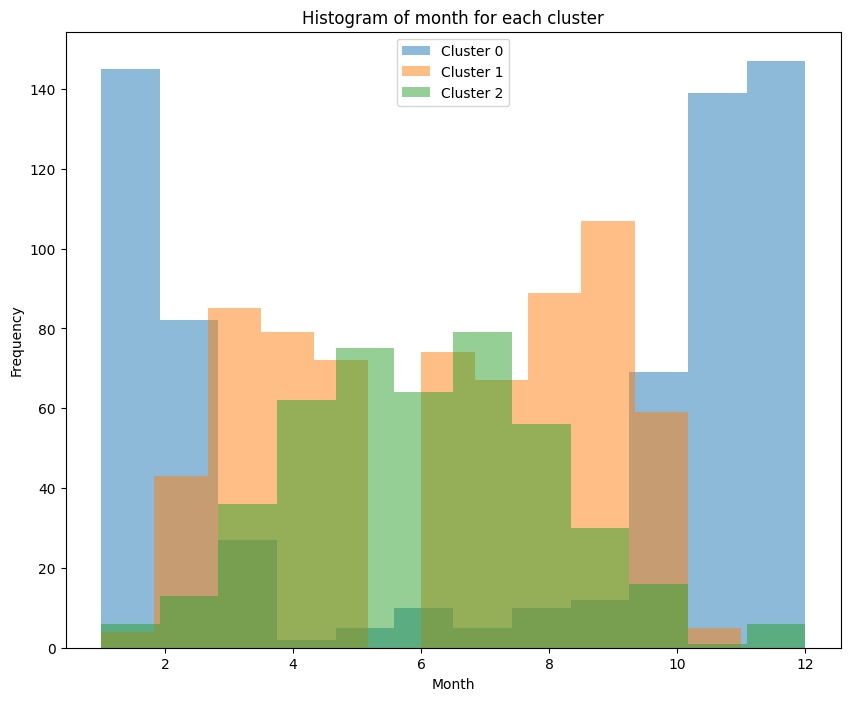

In [340]:
# make a histogram for each cluster for the month column and weekday column
plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    plt.hist(prices_df[prices_df['cluster'] == i]['month'], alpha=0.5, label='Cluster {}'.format(i), bins=12)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of month for each cluster')
plt.legend()
plt.show()

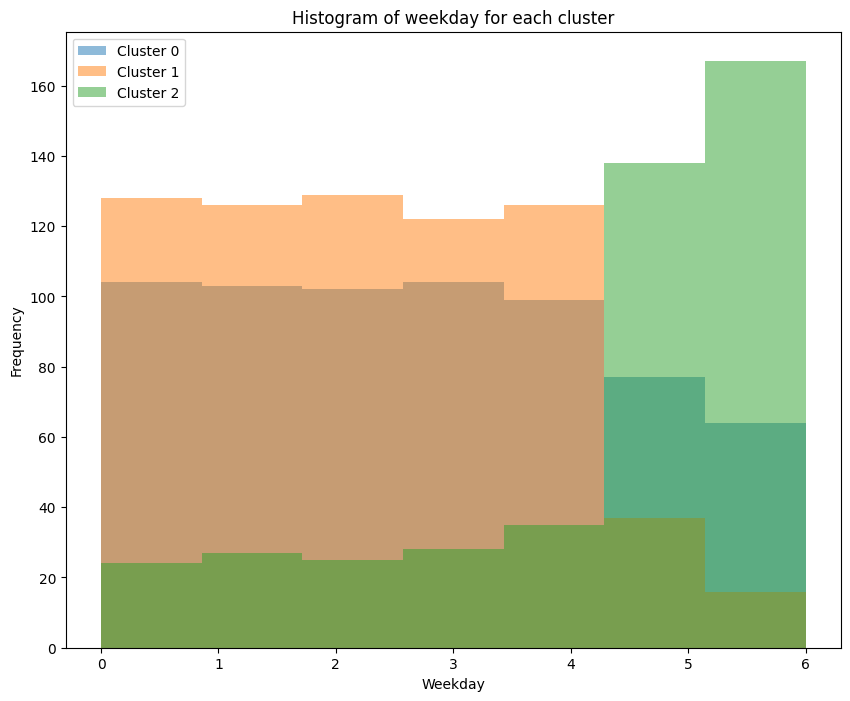

In [341]:
plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    plt.hist(prices_df[prices_df['cluster'] == i]['weekday'], alpha=0.5, label='Cluster {}'.format(i), bins=7)
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.title('Histogram of weekday for each cluster')
plt.legend()
plt.show()

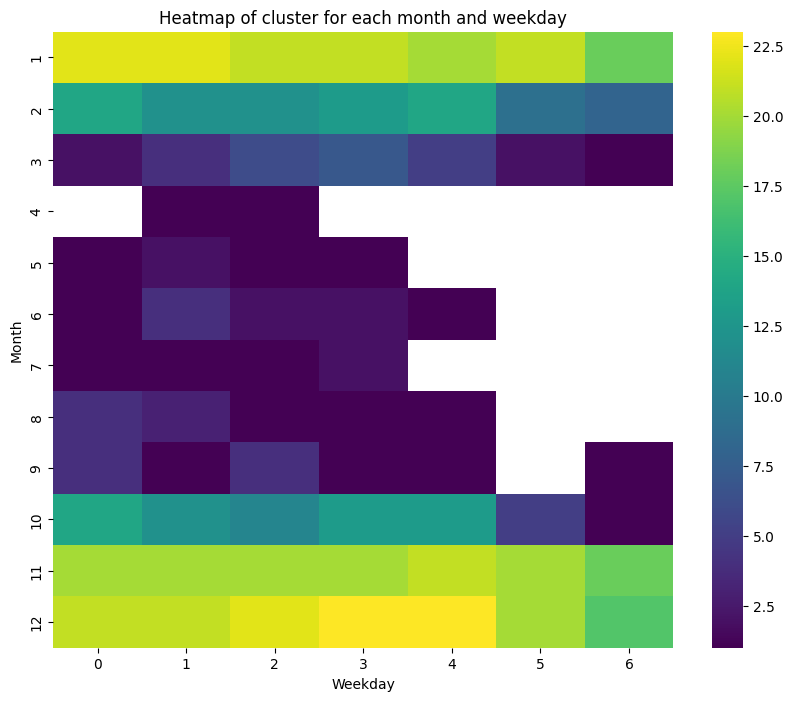

In [342]:
# make a sns heatmap with weekday and month on the x and y axis and the cluster as the color
heatmap_data = prices_df[prices_df['cluster'] == 0].pivot_table(index='month', columns='weekday', values='cluster', aggfunc='count')
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.xlabel('Weekday')
plt.ylabel('Month')
plt.title('Heatmap of cluster for each month and weekday')
plt.show()


In [343]:
kmeans.cluster_centers_[2].mean()

0.0

-0.026808781266999444
0.12556175827410518
-0.015975940365761


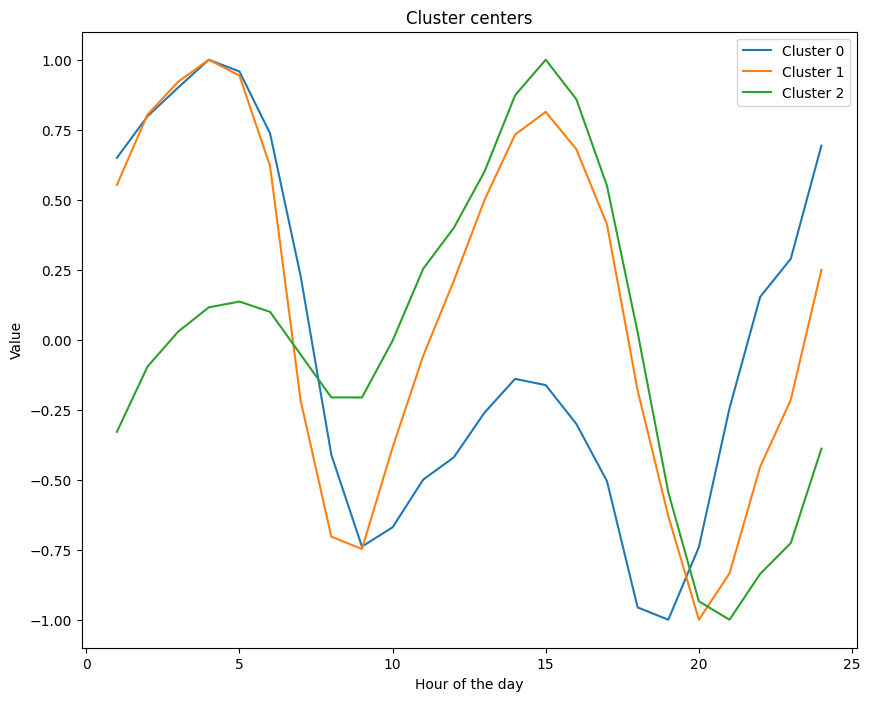

In [344]:
# invert the centroids
centroids = kmeans.cluster_centers_*-1
#divide positive values by max positive value and negative values by max negative value
for i in range(n_clusters):
    max_pos = centroids[i][centroids[i]>0].max()
    max_neg = centroids[i][centroids[i]<0].min()*-1
    centroids[i][centroids[i]>0] = centroids[i][centroids[i]>0]/max_pos
    centroids[i][centroids[i]<0] = centroids[i][centroids[i]<0]/max_neg
    print(centroids[i].mean())

plt.figure(figsize=(10, 8))
plt.plot(hours, centroids.T)
plt.xlabel('Hour of the day')
plt.ylabel('Value')
plt.title('Cluster centers')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()